In [1]:
import os

os.environ['NEO4J_BOLT_URL']='bolt://localhost:7687'
os.environ['NEO_PASS']='rl123456'
os.environ['NEO_USER']='neo4j'

In [2]:
import torch
from data_helpers.data_preparation import StateLoader
from models.HeCo import HeCo
from heco_params import heco_params

count_mps=2
args = heco_params()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder


In [3]:
st_loader = StateLoader(nr_mps=2, mps=None)
(batch_pos1, batch_pos2, batch_neg1), all_state_keys, all_aff_keys, all_obj_keys, action_keys, (fstate_p1, fstate_p2, fstate_n1) = st_loader.get_subgraph_episode_data(batch_size=1)
feats = batch_pos1[0][0]
nei_index = batch_pos1[0][1]
mps = st_loader.generate_mps_episode(nei_index,  fstate_p1)
mps_dims = [mp.shape[1] for mp in mps]
feats_dim_list = [i.shape[1] for i in batch_pos1[0][0]]

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20836.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20836.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20836.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20836.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21277.pickle
C:\Users\WorkStation\Documents\rl_main_l

In [6]:
def get_data_for_episode(st_loader, batch, full_state):
    feats = batch[0][0]
    nei_index = batch[0][1]
    mps = st_loader.generate_mps_episode(nei_index, full_state)
    return feats, nei_index, mps


In [5]:
def get_encoding_task_incp(model, task, succ):
    alpha=0.5
    loss_type=None
    push_succ_1, all_state_keys, all_aff_keys, all_obj_keys, action_keys, fstate_push_succ_p1, anchor_file_push_succ_1 = st_loader.get_subgraph_episode_data_by_task_incp(task_1=task, succ_fail=succ)
    feats_push_succ_1, nei_index_push_succ_1, mps_push_succ_1 = get_data_for_episode(st_loader, push_succ_1, fstate_push_succ_p1)
    z_sc_push_succ_1, z_mp_push_succ_1, intra_push_succ_1, inter_push_succ_1 = model(feats_push_succ_1, mps_push_succ_1,nei_index_push_succ_1, alpha, loss_type, testing=True)
    return z_sc_push_succ_1, anchor_file_push_succ_1

In [7]:
def get_encoding_task(model, ep_ids, task, succ):
    alpha=0.5
    loss_type=None
    push_succ_1, all_state_keys, all_aff_keys, all_obj_keys, action_keys, fstate_push_succ_p1, anchor_file_push_succ_1 = st_loader.get_subgraph_episode_data_by_ids(ep_ids)
    feats_push_succ_1, nei_index_push_succ_1, mps_push_succ_1 = get_data_for_episode(st_loader, push_succ_1, fstate_push_succ_p1)
    z_sc_push_succ_1, z_mp_push_succ_1, intra_push_succ_1, inter_push_succ_1 = model(feats_push_succ_1, mps_push_succ_1,nei_index_push_succ_1, alpha, loss_type, testing=True)
    return z_sc_push_succ_1, anchor_file_push_succ_1

In [8]:
def get_encoding_task_new(model, ep_ids):
    alpha=0.5
    loss_type=None
    push_succ_1, all_state_keys, all_aff_keys, all_obj_keys, action_keys, fstate_push_succ_p1, anchor_file_push_succ_1 = st_loader.get_subgraph_episode_data_by_id(ep_ids)
    feats_push_succ_1, nei_index_push_succ_1, mps_push_succ_1 = get_data_for_episode(st_loader, push_succ_1, fstate_push_succ_p1)
    z_sc_push_succ_1, z_mp_push_succ_1, intra_push_succ_1, inter_push_succ_1 = model(feats_push_succ_1, mps_push_succ_1,nei_index_push_succ_1, alpha, loss_type, testing=True)
    return z_sc_push_succ_1, anchor_file_push_succ_1

In [9]:
dirs= ['checkpoints_12_cum20', 'checkpoints_15_cum20','checkpoints_hybrid']

checkpoints = []
for check_dir in dirs:
    PATH_TO_CHECKPOINTS = os.path.join(str(os.getcwd()),check_dir)
    files = os.listdir(PATH_TO_CHECKPOINTS)

    if check_dir == 'checkpoints_hybrid':
        file = files[33]
        print(files[33])
        print(file)
    else:
        print(files[21])
        file = files[21]
    
    checkpoint_path = os.path.join(PATH_TO_CHECKPOINTS, file)
    checkpoints.append(checkpoint_path)
    
print(checkpoints)


ep_triplet_1.2_29_0.0.pkl
ep_triplet_1.5_25_0.0.pkl
ep_hybrid_1.5_19_0.1439601331949234.pkl
ep_hybrid_1.5_19_0.1439601331949234.pkl
['C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_12_cum20\\ep_triplet_1.2_29_0.0.pkl', 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_15_cum20\\ep_triplet_1.5_25_0.0.pkl', 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_hybrid\\ep_hybrid_1.5_19_0.1439601331949234.pkl']


In [10]:
def compute_encodings_incp(checkpoint):
    tasks = ["CreateLevelPush-v0",
                       "CreateLevelBuckets-v0",
                       "CreateLevelBasket-v0","CreateLevelBelt-v0",
                       "CreateLevelObstacle-v0"]
    succ_fail = ['true', 'false']
    model = HeCo(args.hidden_dim, feats_dim_list, args.feat_drop, args.attn_drop,
                 count_mps, args.sample_rate, args.nei_num, args.tau, args.lam, mps_dims).to(device)
    model.load_state_dict(torch.load(checkpoint))
    files_used = []

    model.eval()
    z_encodings = []
    labels = []
    # Loop through tasks and outcomes to fetch episodes
    for task in tasks:
        for outcome in succ_fail:
            for _ in range(num_episodes_per_type):
                #try:
                z_sc, anchor_file = get_encoding_task_incp(model, task, outcome)
                files_used.append(anchor_file)
                z_encodings.append(z_sc)
                labels.append((task, outcome))
#                 #except:
#                     print(task)
#                     continue

    # Convert list of tensors to a tensor for efficient operations
    if len(z_encodings) > 0:
        z_encodings = torch.stack(z_encodings)
    return z_encodings, labels, files_used

In [11]:
def compute_encodings(checkpoint, ep_ids):
    tasks = ["CreateLevelPush-v0",
                       "CreateLevelBuckets-v0",
                       "CreateLevelBasket-v0","CreateLevelBelt-v0",
                       "CreateLevelObstacle-v0"]
    succ_fail = ['true', 'false']
    model = HeCo(args.hidden_dim, feats_dim_list, args.feat_drop, args.attn_drop,
                 count_mps, args.sample_rate, args.nei_num, args.tau, args.lam, mps_dims).to(device)
    model.load_state_dict(torch.load(checkpoint))

    model.eval()
    z_encodings = []
    labels = []
    for path_ep in ep_ids:
        path_ep =path_ep.replace('ep_data_incomplete_40','ep_data')
        print(path_ep)
        z_sc, anchor_file = get_encoding_task_new(model,path_ep)
        z_encodings.append(z_sc)
        task = os.path.basename(os.path.dirname(os.path.dirname(path_ep)))
        outcome = os.path.basename(os.path.dirname(path_ep))
        labels.append((task, outcome))
        
    # Loop through tasks and outcomes to fetch episodes
#     for task in tasks:
#         for outcome in succ_fail:
#             for _ in range(num_episodes_per_type):
#                 z_sc, anchor_file = get_encoding_task(model,ep_ids, task, outcome)
#                 z_encodings.append(z_sc)
#                 labels.append((task, outcome))
#                 except Exception as e:
#                     print(e)
#                     print(task)
#                     continue

    # Convert list of tensors to a tensor for efficient operations
    z_encodings = torch.stack(z_encodings)
    return z_encodings, labels

In [12]:
import torch
import torch.nn.functional as F
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def compute_clusters_by_outcome(z_encodings, labels, tasks):
    # Convert tensor to numpy for sklearn compatibility
    z_encodings_np = z_encodings.cpu().detach().numpy()
    z_encodings_np = z_encodings_np.squeeze(1)  # Ensure the encodings are 2D: [num_samples, feature_dim]

    # Prepare dataframes for success and failure episodes
    df = pd.DataFrame({
        'task': [label[0] for label in labels],  # Original task names
        'outcome': [label[1] for label in labels]  # Success/Failure outcome
    })
    
    # Filter the encodings based on success and failure
    success_indices = df[df['outcome'] == 'true'].index
    failure_indices = df[df['outcome'] == 'false'].index

    z_success = z_encodings_np[success_indices]
    z_failure = z_encodings_np[failure_indices]

    # Define number of clusters as the number of unique tasks
    n_clusters = len(tasks)

    # Perform K-means clustering on successful episodes
    kmeans_success = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_success = kmeans_success.fit_predict(z_success)
    
    # Create a DataFrame for successful episodes with their cluster labels
    df_clusters_success = pd.DataFrame({
        'task': df.loc[success_indices, 'task'].values,
        'cluster': cluster_labels_success
    })

    # Perform K-means clustering on unsuccessful episodes
    kmeans_failure = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_failure = kmeans_failure.fit_predict(z_failure)

    # Create a DataFrame for unsuccessful episodes with their cluster labels
    df_clusters_failure = pd.DataFrame({
        'task': df.loc[failure_indices, 'task'].values,
        'cluster': cluster_labels_failure
    })

    # Visualize the clusters for successful episodes using PCA
    pca_success = PCA(n_components=2)
    z_success_pca = pca_success.fit_transform(z_success)
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=z_success_pca[:, 0], y=z_success_pca[:, 1],
        hue=df_clusters_success['task'],
        palette='tab10', s=100
    )
    plt.title('K-means Clustering of Successful Episodes (PCA Reduced)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Task')
    plt.tight_layout()
    plt.show()

    # Visualize the clusters for unsuccessful episodes using PCA
    pca_failure = PCA(n_components=2)
    z_failure_pca = pca_failure.fit_transform(z_failure)
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=z_failure_pca[:, 0], y=z_failure_pca[:, 1],
        hue=df_clusters_failure['task'],
        palette='tab10', s=100
    )
    plt.title('K-means Clustering of Unsuccessful Episodes (PCA Reduced)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Task')
    plt.tight_layout()
    plt.show()

    # Evaluate clustering by task for success
    print("Cluster counts per task for successful episodes:")
    print(df_clusters_success.groupby(['task', 'cluster']).size())

    # Evaluate clustering by task for failure
    print("\nCluster counts per task for unsuccessful episodes:")
    print(df_clusters_failure.groupby(['task', 'cluster']).size())

    return df_clusters_success, df_clusters_failure

In [13]:
checkpoints

['C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_12_cum20\\ep_triplet_1.2_29_0.0.pkl',
 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_15_cum20\\ep_triplet_1.5_25_0.0.pkl',
 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_hybrid\\ep_hybrid_1.5_19_0.1439601331949234.pkl']

In [14]:
z_encodings_diff_checkpoints_incp = []
z_encoding_labels_incp = []
num_episodes_per_type = 5

z_enc, labels, files_used = compute_encodings_incp(checkpoints[2])
z_encoding_labels_incp.append(labels)
z_encodings_diff_checkpoints_incp.append(z_enc)

# for checkpoint in checkpoints[2]:
#     print(checkpoint)
#     z_enc, labels = compute_encodings_incp(checkpoint)
#     z_encoding_labels_incp.append(labels)
#     z_encodings_diff_checkpoints_incp.append(z_enc)

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4716.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4716.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4716.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4716.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1893.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1893.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1893.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1893.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3723.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3723.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3723.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3723.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1387.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1387.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1387.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1387.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4812.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19394.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19394.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19394.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19394.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19167.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19167.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19167.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19167.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19337.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19337.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19337.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19337.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18647.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18647.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18647.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18647.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18455.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18455.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18455.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18455.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20258.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20258.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20258.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20258.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21516.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21516.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21516.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21516.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21484.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21310.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21310.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21310.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21310.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21908.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22496.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22496.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22496.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22496.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22597.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22597.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22597.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22597.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22332.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22332.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22332.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data_incomplete_40\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22332.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


In [15]:
file = 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\ep_data_reordered\\CreateLevelPush-v0\\true\\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle'
task = os.path.basename(os.path.dirname(os.path.dirname(file)))
success_status = os.path.basename(os.path.dirname(file))
print(task)
print(success_status)

CreateLevelPush-v0
true


In [ ]:
file =file.replace('ep_data_reordered','ep_data')
print(file)

In [16]:
files_used

['C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\ep_data_incomplete_40\\CreateLevelPush-v0\\true\\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle',
 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\ep_data_incomplete_40\\CreateLevelPush-v0\\true\\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle',
 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\ep_data_incomplete_40\\CreateLevelPush-v0\\true\\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle',
 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\ep_data_incomplete_40\\CreateLevelPush-v0\\true\\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle',
 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\ep_data_incomplete_40\\CreateLevelPush-v0\\true\\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle',
 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder

In [17]:
z_encodings_diff_checkpoints_incp

[tensor([[[ 0.1292,  0.5613,  0.7612,  ...,  0.9299,  0.0080,  0.3850]],
 
         [[ 0.1483,  0.4983,  0.7112,  ...,  0.8518,  0.0700,  0.2053]],
 
         [[ 0.1363,  0.5032,  0.7627,  ...,  1.0941, -0.0262,  0.5569]],
 
         ...,
 
         [[ 0.2417, -0.2447,  0.0144,  ...,  0.1472,  0.0412,  0.6195]],
 
         [[ 0.2298, -0.2594, -0.0066,  ...,  0.1266,  0.0697,  0.6580]],
 
         [[ 0.1765, -0.2386, -0.0362,  ...,  0.1140,  0.0793,  0.6541]]],
        device='cuda:0', grad_fn=<StackBackward>)]

In [18]:

tasks = ["CreateLevelPush-v0",
                       "CreateLevelBuckets-v0",
                       "CreateLevelBasket-v0","CreateLevelBelt-v0",
                       "CreateLevelObstacle-v0"]

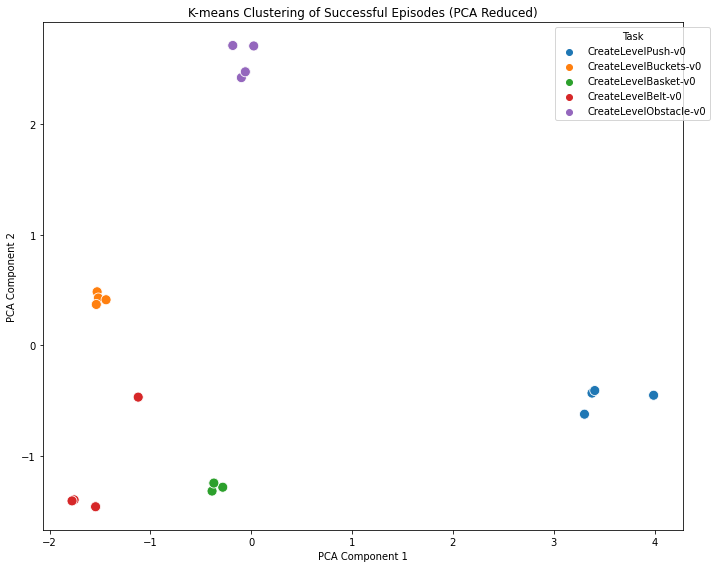

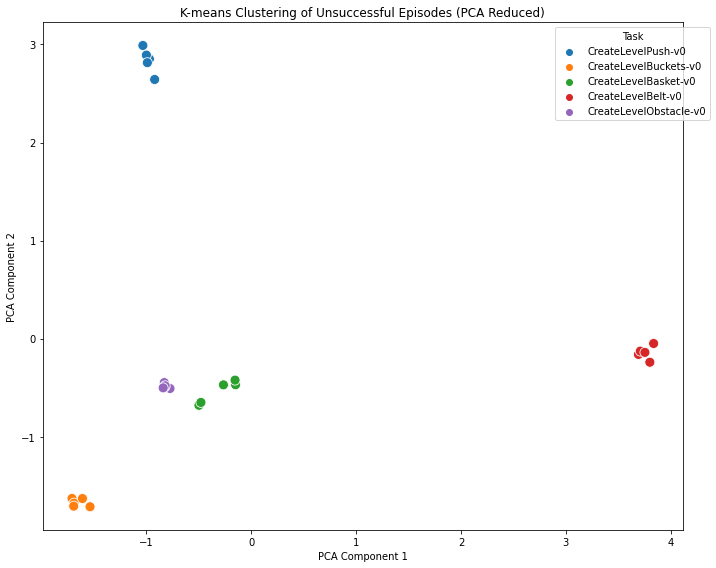

Cluster counts per task for successful episodes:
task                    cluster
CreateLevelBasket-v0    2          5
CreateLevelBelt-v0      2          1
                        3          4
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64

Cluster counts per task for unsuccessful episodes:
task                    cluster
CreateLevelBasket-v0    1          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      3          5
dtype: int64


In [19]:
for idx, z_encodings in enumerate(z_encodings_diff_checkpoints_incp):
    df_clusters_s, df_clusters_fail = compute_clusters_by_outcome(z_encodings, z_encoding_labels_incp[idx], tasks)

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def compute_clusters(z_encodings, labels):
    z_encodings_np = z_encodings.cpu().detach().numpy()  # Convert to numpy for sklearn
    n_clusters = len(tasks)  # Total number of tasks as the number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    z_encodings_np = z_encodings_np.squeeze(1)
    cluster_labels = kmeans.fit_predict(z_encodings_np)

    # Map cluster labels to the original task names for analysis
    df_clusters = pd.DataFrame({
        'task': [label[0] for label in labels],  # Original task names
        'outcome': [label[1] for label in labels],  # Success/Failure outcome
        'cluster': cluster_labels
    })


    # Visualize the clusters using PCA for dimensionality reduction
    pca = PCA(n_components=2)
    z_encodings_pca = pca.fit_transform(z_encodings_np)

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=z_encodings_pca[:, 0], y=z_encodings_pca[:, 1],
        hue=df_clusters['task'], style=df_clusters['outcome'],
        palette='tab10', s=100
    )
    plt.title('K-means Clustering of Episode Encodings (PCA Reduced)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Task')
    plt.tight_layout()
    plt.show()

    # Evaluate clustering by task
    print("Cluster counts per task:")
    print(df_clusters.groupby(['task', 'cluster']).size())
    return df_clusters
    

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compute_clusters_new(z_encodings, labels):
    z_encodings_np = z_encodings.cpu().detach().numpy()  # Convert to numpy for sklearn
    n_clusters = len(tasks)  # Total number of tasks as the number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    z_encodings_np = z_encodings_np.squeeze(1)
    cluster_labels = kmeans.fit_predict(z_encodings_np)

    # Map cluster labels to the original task names for analysis
    df_clusters = pd.DataFrame({
        'task': [label[0] for label in labels],  # Original task names
        'outcome': [label[1] for label in labels],  # Success/Failure outcome
        'cluster': cluster_labels
    })

    # Apply PCA to the entire dataset
    pca = PCA(n_components=2)
    z_encodings_pca = pca.fit_transform(z_encodings_np)

    # Filter to only include "true" outcomes
    df_clusters = df_clusters[df_clusters['outcome'] == 'true'].reset_index(drop=True)
    z_encodings_pca_filtered = z_encodings_pca[df_clusters.index]  # Align the PCA output with filtered data

    # Visualize the clusters using PCA-reduced data for "true" outcomes
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=z_encodings_pca_filtered[:, 0], y=z_encodings_pca_filtered[:, 1],
        hue=df_clusters['task'], style=df_clusters['outcome'],
        palette='tab10', s=100
    )
    plt.title('K-means Clustering of Successful Episodes (PCA Reduced)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Task')
    plt.tight_layout()
    plt.show()

    # Evaluate clustering by task
    print("Cluster counts per task:")
    print(df_clusters.groupby(['task', 'cluster']).size())
    return df_clusters


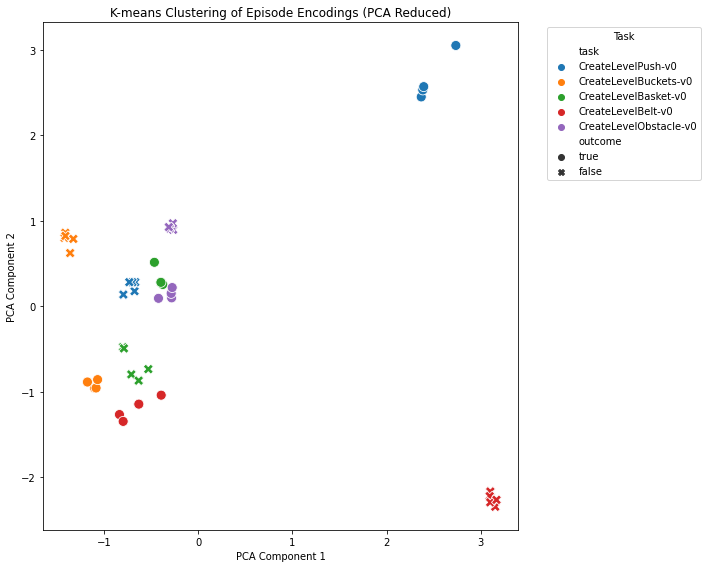

Cluster counts per task:
task                    cluster
CreateLevelBasket-v0    0          5
                        3          5
CreateLevelBelt-v0      1          5
                        3          5
CreateLevelBuckets-v0   0          5
                        3          5
CreateLevelObstacle-v0  0          5
                        4          5
CreateLevelPush-v0      2          5
                        4          5
dtype: int64


In [22]:
for idx, z_encodings in enumerate(z_encodings_diff_checkpoints_incp):
    df_clusters_s = compute_clusters(z_encodings, z_encoding_labels_incp[idx])

In [23]:

z_encodings_diff_checkpoints = []
z_encoding_labels = []

z_enc, labels = compute_encodings(checkpoints[2], files_used)
z_encoding_labels.append(labels)
z_encodings_diff_checkpoints.append(z_enc)


# z_encodings_diff_checkpoints = []
# z_encoding_labels = []
# for checkpoint in checkpoints:
#     print(checkpoint)
#     z_enc, labels = compute_encodings(checkpoint)
#     z_encoding_labels.append(labels)
#     z_encodings_diff_checkpoints.append(z_enc)

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4716.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4716.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4716.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4716.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4716.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1893.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1893.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1893.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1893.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1893.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3723.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3723.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3723.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3723.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3723.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1387.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1387.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1387.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1387.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1387.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4812.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19394.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19394.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19394.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19394.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19394.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19167.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19167.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19167.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19167.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19167.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19337.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19337.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19337.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19337.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19337.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18647.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18647.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18647.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18647.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18647.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18455.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18455.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18455.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18455.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18455.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18357.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20258.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20258.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20258.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20258.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20258.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21516.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21516.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21516.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21516.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21516.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21484.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21310.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21310.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21310.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21310.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21310.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21908.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22496.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22496.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22496.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22496.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22496.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22597.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22597.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22597.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22597.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22597.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22332.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22332.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22332.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22332.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22332.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


In [24]:
z_encodings_diff_checkpoints

[tensor([[[ 0.1403,  0.5632,  0.7833,  ...,  0.9454,  0.0282,  0.3884]],
 
         [[ 0.1499,  0.4784,  0.7401,  ...,  0.9143,  0.0488,  0.2724]],
 
         [[ 0.1386,  0.4757,  0.7051,  ...,  1.0613, -0.0434,  0.5718]],
 
         ...,
 
         [[ 0.2367, -0.2421, -0.0026,  ...,  0.1779,  0.0405,  0.5998]],
 
         [[ 0.2133, -0.2544, -0.0139,  ...,  0.1574,  0.0585,  0.6465]],
 
         [[ 0.1473, -0.2391, -0.0281,  ...,  0.1406,  0.0659,  0.6508]]],
        device='cuda:0', grad_fn=<StackBackward>)]

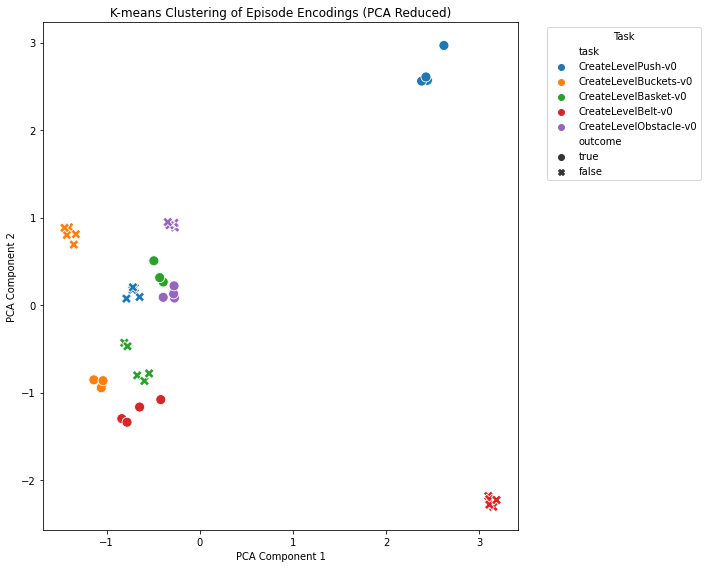

Cluster counts per task:
task                    cluster
CreateLevelBasket-v0    1          5
                        2          5
CreateLevelBelt-v0      2          5
                        4          5
CreateLevelBuckets-v0   1          5
                        2          5
CreateLevelObstacle-v0  0          5
                        1          5
CreateLevelPush-v0      0          5
                        3          5
dtype: int64


In [25]:
for idx, z_encodings in enumerate(z_encodings_diff_checkpoints):
    df_clusters_s = compute_clusters(z_encodings, z_encoding_labels[idx])

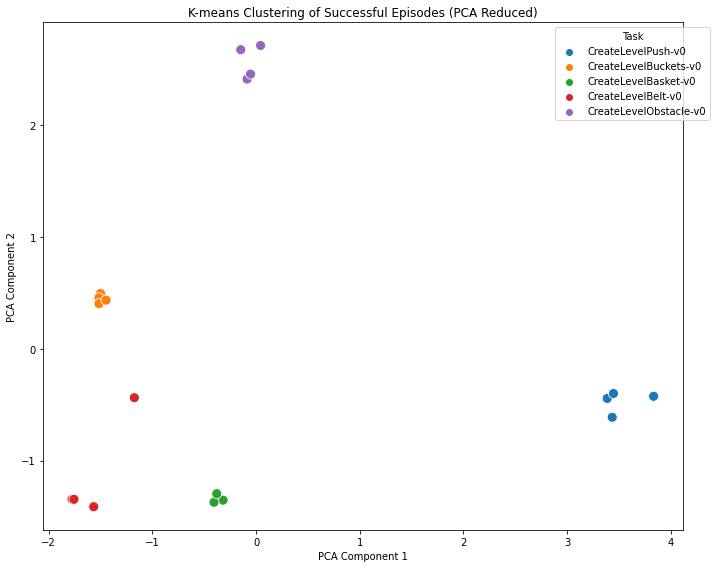

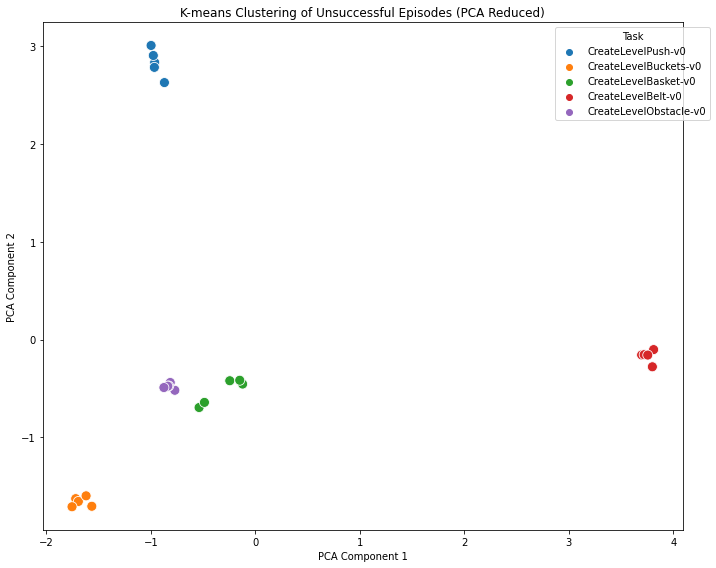

Cluster counts per task for successful episodes:
task                    cluster
CreateLevelBasket-v0    2          5
CreateLevelBelt-v0      2          1
                        3          4
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64

Cluster counts per task for unsuccessful episodes:
task                    cluster
CreateLevelBasket-v0    1          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      3          5
dtype: int64


In [26]:
for idx, z_encodings in enumerate(z_encodings_diff_checkpoints):
    df_clusters_s, df_clusters_fail = compute_clusters_by_outcome(z_encodings, z_encoding_labels[idx], tasks)

In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def compute_clusters_by_outcome_metrics(z_encodings, labels, tasks):
    # Convert tensor to numpy for sklearn compatibility
    z_encodings_np = z_encodings.cpu().detach().numpy()
    z_encodings_np = z_encodings_np.squeeze(1)  # Ensure the encodings are 2D: [num_samples, feature_dim]

    # Prepare dataframes for success and failure episodes
    df = pd.DataFrame({
        'task': [label[0] for label in labels],  # Original task names
        'outcome': [label[1] for label in labels]  # Success/Failure outcome
    })
    
    # Filter the encodings based on success and failure
    success_indices = df[df['outcome'] == 'true'].index
    failure_indices = df[df['outcome'] == 'false'].index

    z_success = z_encodings_np[success_indices]
    z_failure = z_encodings_np[failure_indices]

    # Define number of clusters as the number of unique tasks
    n_clusters = len(tasks)

    # Perform K-means clustering on successful episodes
    kmeans_success = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_success = kmeans_success.fit_predict(z_success)
    
    # Calculate silhouette score for successful episodes
    silhouette_success = silhouette_score(z_success, cluster_labels_success)
    
    # Calculate Davies-Bouldin Index for successful episodes
    dbi_success = davies_bouldin_score(z_success, cluster_labels_success)
    
    # Calculate Dunn Index for successful episodes
    inter_cluster_distances = pdist(kmeans_success.cluster_centers_)
    intra_cluster_distances = np.max([np.mean(pdist(z_success[cluster_labels_success == i])) for i in range(n_clusters)])
    dunn_index_success = np.min(inter_cluster_distances) / intra_cluster_distances

    # Repeat clustering and metrics calculation for unsuccessful episodes
    kmeans_failure = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_failure = kmeans_failure.fit_predict(z_failure)
    
    silhouette_failure = silhouette_score(z_failure, cluster_labels_failure)
    dbi_failure = davies_bouldin_score(z_failure, cluster_labels_failure)
    
    inter_cluster_distances_failure = pdist(kmeans_failure.cluster_centers_)
    intra_cluster_distances_failure = np.max([np.mean(pdist(z_failure[cluster_labels_failure == i])) for i in range(n_clusters)])
    dunn_index_failure = np.min(inter_cluster_distances_failure) / intra_cluster_distances_failure

    # Track metrics in a dictionary
    metrics = {
        'silhouette_success': silhouette_success,
        'silhouette_failure': silhouette_failure,
        'dbi_success': dbi_success,
        'dbi_failure': dbi_failure,
        'dunn_index_success': dunn_index_success,
        'dunn_index_failure': dunn_index_failure
    }
    
    return metrics

def evaluate_checkpoints(z_encodings_diff_checkpoints, z_encoding_labels, tasks):
    # Store metrics for each checkpoint
    all_metrics = []
    best_checkpoint = None
    best_score = -np.inf  # Track best score based on silhouette

    for idx, z_encodings in enumerate(z_encodings_diff_checkpoints):
        # Compute metrics for current checkpoint
        metrics = compute_clusters_by_outcome_metrics(z_encodings, z_encoding_labels[idx], tasks)
        all_metrics.append((idx, metrics))
        
        # Determine if this checkpoint has the best silhouette score
        current_score = max(metrics['silhouette_success'], metrics['silhouette_failure'])
        if current_score > best_score:
            best_score = current_score
            best_checkpoint = idx

        # Plot silhouette scores for successful and unsuccessful episodes
        plt.figure(figsize=(8, 6))
        plt.bar(['Silhouette Success', 'Silhouette Failure'], 
                [metrics['silhouette_success'], metrics['silhouette_failure']])
        plt.title(f'Checkpoint {idx}: Silhouette Scores')
        plt.xlabel('Episode Outcome')
        plt.ylabel('Silhouette Score')
        plt.show()

    print(f"Best checkpoint based on silhouette score: Checkpoint {best_checkpoint} with score {best_score}")
    
    return best_checkpoint, all_metrics


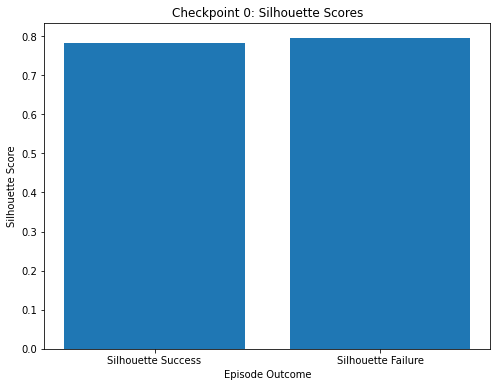

Best checkpoint based on silhouette score: Checkpoint 0 with score 0.7948118448257446


In [28]:
import numpy as np

best_checkpoint, all_metrics = evaluate_checkpoints(z_encodings_diff_checkpoints, z_encoding_labels, tasks)


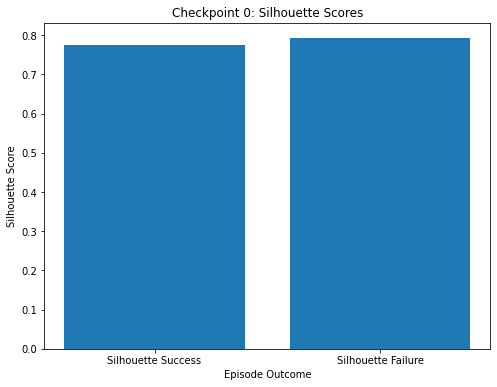

Best checkpoint based on silhouette score: Checkpoint 0 with score 0.7923671007156372


In [29]:
best_checkpoint_incp, all_metrics_incp = evaluate_checkpoints(z_encodings_diff_checkpoints_incp, z_encoding_labels_incp, tasks)


In [30]:
all_metrics_incp

[(0,
  {'silhouette_success': 0.7757677,
   'silhouette_failure': 0.7923671,
   'dbi_success': 0.38287019667333827,
   'dbi_failure': 0.4150067318868674,
   'dunn_index_success': 2.5224047483891554,
   'dunn_index_failure': 2.0321288987811252})]

In [31]:
all_metrics

[(0,
  {'silhouette_success': 0.78304476,
   'silhouette_failure': 0.79481184,
   'dbi_success': 0.37492129440404576,
   'dbi_failure': 0.41296548489117857,
   'dunn_index_success': 2.5570347644710276,
   'dunn_index_failure': 2.0189670695052224})]